In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv("C:\\Users\\Admin\\Downloads\\CricketDataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     7494 non-null   int64 
 1   Scorecard      7494 non-null   object
 2   Team 1         7494 non-null   object
 3   Team 2         7494 non-null   object
 4   Margin         7494 non-null   object
 5   Ground         7494 non-null   object
 6   Match Date     7494 non-null   object
 7   Winner         7494 non-null   object
 8   Host_Country   7364 non-null   object
 9   Venue_Team1    7494 non-null   object
 10  Venue_Team2    7494 non-null   object
 11  Innings_Team1  7494 non-null   object
 12  Innings_Team2  7494 non-null   object
dtypes: int64(1), object(12)
memory usage: 761.2+ KB


In [349]:
df.tail()

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
3742,3747,ODI # 3931,India,New Zealand,Winner2ndInning,Pune,"Oct 25, 2017",India,India,Home,Away,Second,First
3743,3748,ODI # 3932,India,New Zealand,Winner1stInning,Kanpur,"Oct 29, 2017",India,India,Home,Away,First,Second
3744,3749,ODI # 3933,Hong Kong,Namibia,Winner2ndInning,Mumbai,"Aug 12, 2017",Namibia,India,Neutral,Neutral,First,Second
3745,3750,ODI # 3934,Bermuda,U.S.A.,Winner2ndInning,Mumbai,"Aug 12, 2017",U.S.A.,India,Neutral,Neutral,First,Second
3746,3749,ODI # 3935,East Africa,Namibia,Winner1stInning,Mumbai,"Aug 12, 2017",East Africa,India,Neutral,Neutral,First,Second


In [339]:
a= pd.crosstab(df['Team 1']=="Australia",df['Team 2']=="Australia",  margins=True)

In [340]:
b= pd.crosstab(df['Team 2'],df['Venue_Team2'],  margins=True)

In [341]:
innings_winner= pd.crosstab(df['Winner'],df['Margin'])

In [342]:
df.Winner.value_counts()

Australia       552
India           475
Pakistan        466
West Indies     380
Sri Lanka       371
South Africa    361
England         343
New Zealand     324
Zimbabwe        129
Bangladesh      105
Ireland          51
Afghanistan      42
Kenya            42
Scotland         31
Netherlands      28
Canada           17
U.A.E.            9
Bermuda           7
Hong Kong         6
P.N.G.            5
U.S.A.            1
Namibia           1
East Africa       1
Name: Winner, dtype: int64

In [343]:
winnings= pd.DataFrame(innings_winner)

In [344]:
winnings.reset_index(inplace=True)

In [345]:
winnings.columns=["team_name", '1stinnings', "2ndinnings"]

# numbe of matches hosted by the country 

In [346]:
a=df["Host_Country"].value_counts()
a=pd.DataFrame(a)

In [348]:
a

,Host_Country
Australia,585
India,396
England,387
South Africa,314
New Zealand,301
U.A.E.,295
West Indies,285
Sri Lanka,261
Zimbabwe,202
Bangladesh,199


In [356]:
#which country hosted most matches
a.sort_values(by="Host_Country", ascending=False, inplace=True)

print(a.iloc[0])

Host_Country    585
Name: Australia, dtype: int64


# number of matches win at 1st innings or 2nd innings by team

In [357]:
winnings

,team_name,1stinnings,2ndinnings
0,Afghanistan,19,23
1,Australia,309,243
2,Bangladesh,48,57
3,Bermuda,2,5
4,Canada,7,10
5,East Africa,1,0
6,England,151,192
7,Hong Kong,4,2
8,India,210,265
9,Ireland,22,29


# number of matches played by individual

In [358]:
# number of matches palyed by individual team
x=[]
y=[]

for i in df['Team 2'].unique():
    a=i
    b=len(df[ (df['Team 2'].str.contains(i)) | (df['Team 1'].str.contains(i))])
    x.append(a)
    y.append(b)
z= pd.DataFrame(columns=("team_name","No.of_matches"))
z["team_name"]=x
z["No.of_matches"]=y
c=df["Winner"].value_counts()

In [363]:
z.sort_values("No.of_matches",ascending=False, inplace= True)

In [364]:
z

,team_name,No.of_matches
5,India,880
1,Australia,859
2,Pakistan,854
6,Sri Lanka,766
4,West Indies,731
3,New Zealand,686
0,England,664
11,South Africa,561
9,Zimbabwe,474
10,Bangladesh,328


In [545]:
c.reset_index(inplace=True)

In [546]:
c

,index,Winner
0,Australia,552
1,India,475
2,Pakistan,466
3,West Indies,380
4,Sri Lanka,371
5,South Africa,361
6,England,343
7,New Zealand,324
8,Zimbabwe,129
9,Bangladesh,105


In [543]:
c= pd.DataFrame(c)

In [156]:
c.drop(["level_0"], axis= "columns", inplace=True)

In [547]:
c.rename(columns={"index":"team_name"}, inplace=True)

In [548]:
w= pd.merge(z,c, how="inner", on="team_name")

In [549]:
w.sort_values("No.of_matches", inplace=True)

In [550]:
w.set_index("team_name", inplace=True)

In [551]:
w.reset_index( inplace=True)

In [552]:
w= pd.merge(w, winnings, how="inner", on="team_name")

In [201]:
w["w_percentage"]= (w['Winner']/w["No.of_matches"]).round(2)

In [230]:
w["w_loss"]= (1-w['w_percentage']).round(2)

In [553]:
w

,team_name,No.of_matches,Winner,1stinnings,2ndinnings
0,U.S.A.,3,1,0,1
1,East Africa,4,1,1,0
2,Namibia,8,1,0,1
3,P.N.G.,10,5,2,3
4,Hong Kong,18,6,4,2
5,U.A.E.,35,9,3,6
6,Bermuda,36,7,2,5
7,Netherlands,72,28,10,18
8,Canada,75,17,7,10
9,Afghanistan,81,42,19,23


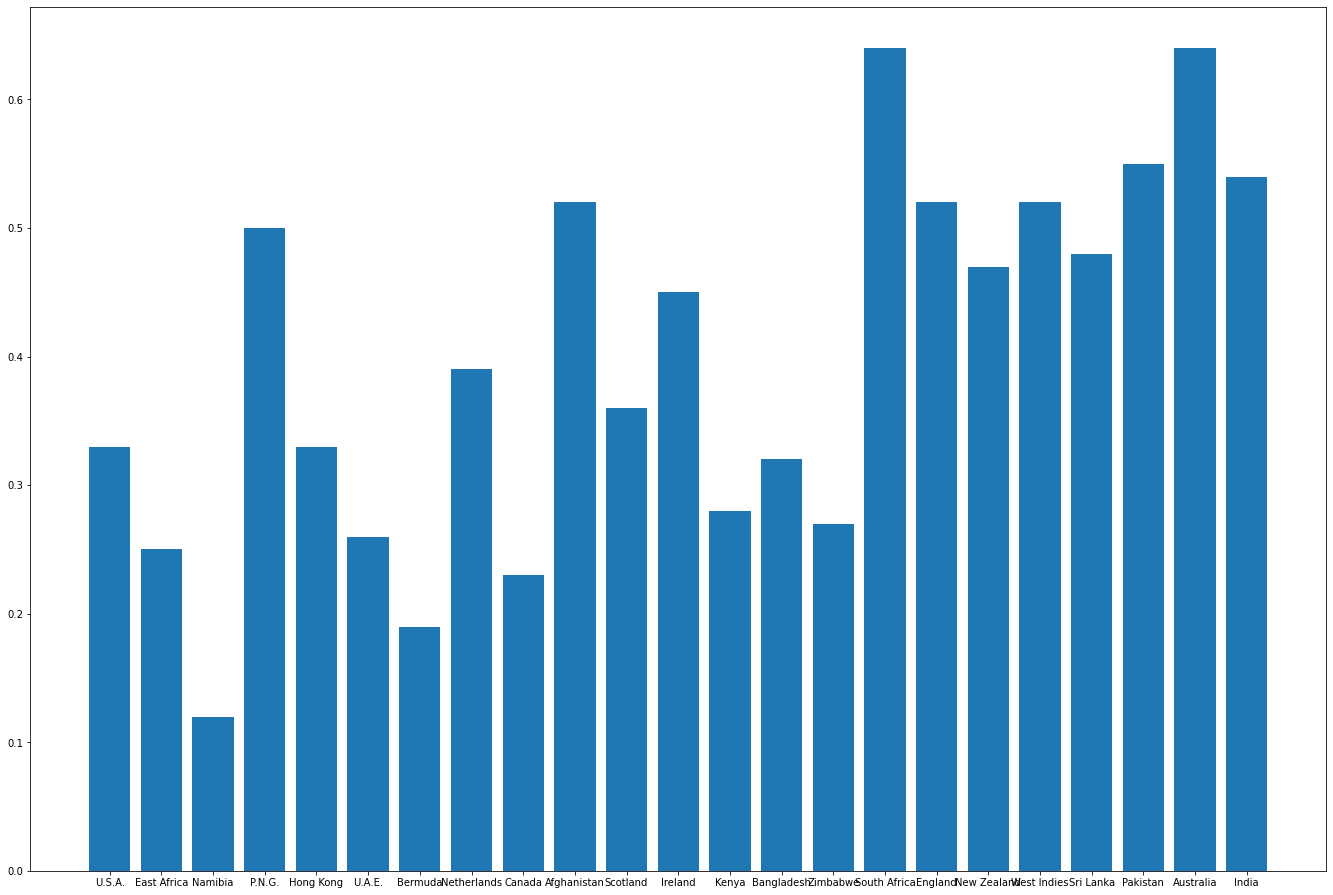

In [336]:
n=len(w)
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
#langs = ['C', 'C++', 'Java', 'Python', 'PHP']
#students = [23,17,35,29,12]
plt.bar(w['team_name'],w['w_percentage'])
plt.show()

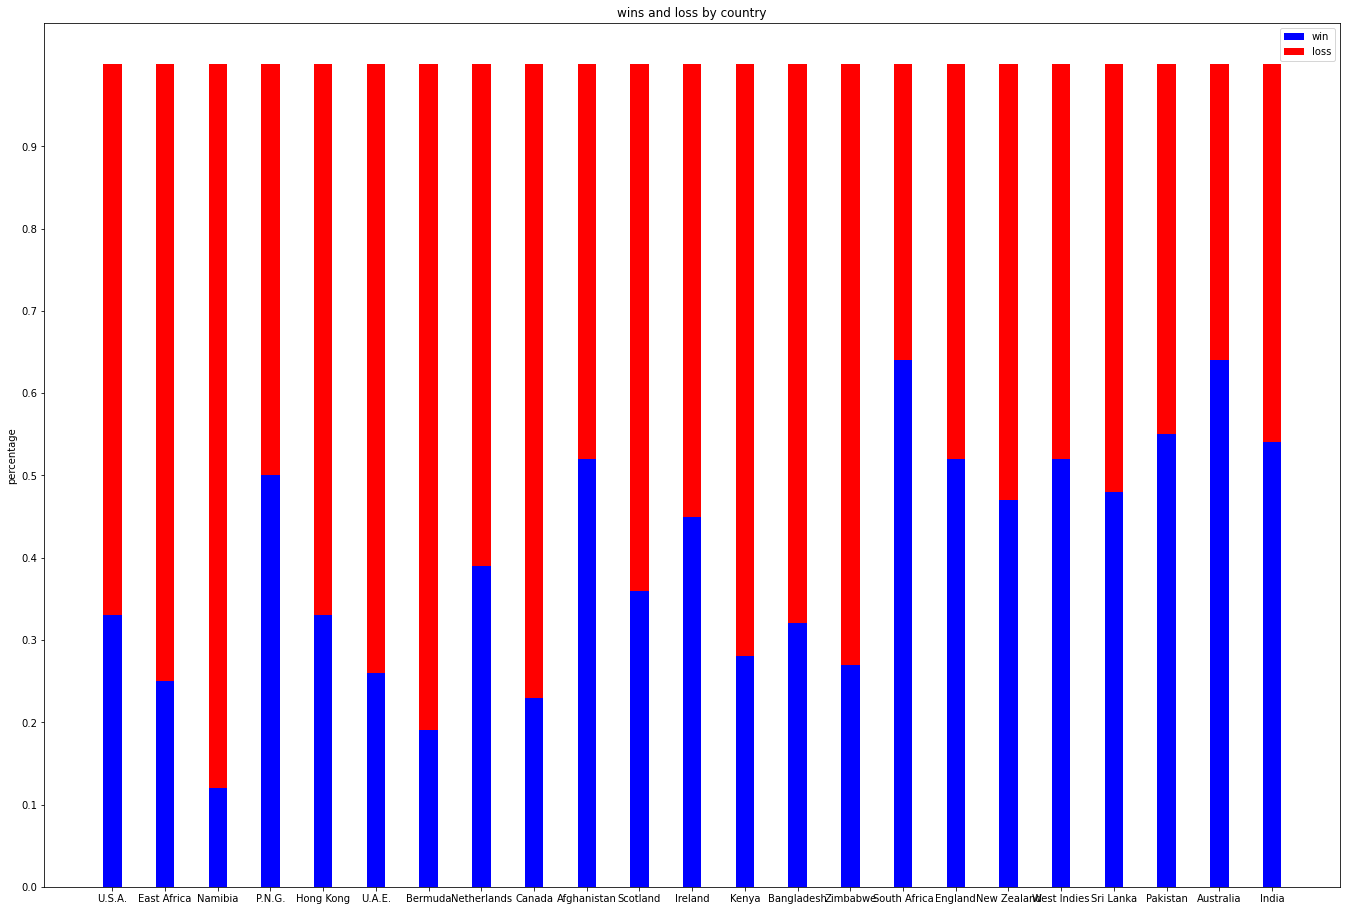

In [337]:
N = len(w)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.bar(ind, w['w_percentage'], width, color='b')
ax.bar(ind,w['w_loss'], width,bottom=w['w_percentage'], color='r')
ax.set_ylabel('percentage')
ax.set_title('wins and loss by country')
#ax.set_xticks(ind, w.team_name)
plt.xticks(ind, w.team_name)
ax.set_yticks(np.arange(0, 1, 0.10))
ax.legend(labels=['win', 'loss'])
plt.show()

In [144]:
c= pd.DataFrame(c)

In [137]:
df[ (df['Team 2'].str.contains('Australia')) | (df['Team 1'].str.contains('Australia'))].shape

(1718, 13)

In [296]:
df

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,3747,ODI # 3931,New Zealand,India,Winner2ndInning,Pune,"Oct 25, 2017",India,India,Away,Home,First,Second
7490,3748,ODI # 3932,New Zealand,India,Winner1stInning,Kanpur,"Oct 29, 2017",India,India,Away,Home,Second,First
7491,3749,ODI # 3933,Namibia,Hong Kong,Winner2ndInning,Mumbai,"Aug 12, 2017",Namibia,India,Neutral,Neutral,Second,First
7492,3750,ODI # 3934,U.S.A.,Bermuda,Winner2ndInning,Mumbai,"Aug 12, 2017",U.S.A.,India,Neutral,Neutral,Second,First


In [306]:
team=df['Team 2'].unique()

# Number of matches to taken to first win by each country

In [367]:
# How many matches was taken to win first match 
x=[]
b=pd.DataFrame()
count=0
for i in df['Team 2'].unique():
    a=i
    b=(df[ (df['Team 2'].str.contains(i)) | (df['Team 1'].str.contains(i))])
    b.sort_values(by="Scorecard", inplace= True)
    count=0
    for j in b.Winner:
        count=count+1
        if i==j:
            break
    x.append(count)

<ipython-input-367-a990d13f66a8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.sort_values(by="Scorecard", inplace= True)


In [368]:
fisrt_win= pd.DataFrame()
fisrt_win["team"]=team
fisrt_win["no_of_matches to win"]=x

In [369]:
x

[3, 1, 1, 2, 1, 3, 2, 4, 1, 5, 11, 1, 5, 4, 13, 8, 7, 9, 3, 2, 1, 1, 1]

In [372]:
fisrt_win["matches_to_win"]=fisrt_win["no_of_matches to win"].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])

In [377]:
fisrt_win.drop(["matches_to_win"],axis= "columns", inplace= True)

In [379]:
fisrt_win.sort_values(['no_of_matches to win'], inplace=True)

In [380]:
fisrt_win

,team,no_of_matches to win
11,South Africa,1
20,Bermuda,1
21,Afghanistan,1
8,Canada,1
22,P.N.G.,1
1,Australia,1
2,Pakistan,1
4,West Indies,1
6,Sri Lanka,2
3,New Zealand,2


In [293]:
pd.DataFrame(df[ (df['Team 2'].str.contains("Australia")) | (df['Team 1'].str.contains('Australia'))])


,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
8,8,ODI # 10,New Zealand,Australia,Winner2ndInning,Dunedin,"Mar 30, 1974",Australia,New Zealand,Home,Away,First,Second
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469,3727,ODI # 3910,Australia,India,Winner1stInning,Chennai,"Sep 17, 2017",India,India,Away,Home,Second,First
7471,3729,ODI # 3912,Australia,India,Winner1stInning,Kolkata,"Sep 21, 2017",India,India,Away,Home,Second,First
7472,3730,ODI # 3914,Australia,India,Winner2ndInning,Indore,"Sep 24, 2017",India,India,Away,Home,First,Second
7475,3733,ODI # 3917,Australia,India,Winner1stInning,Bengaluru,"Sep 28, 2017",Australia,India,Away,Home,First,Second


In [381]:
df.sort_values(by="Scorecard")

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
8,8,ODI # 10,New Zealand,Australia,Winner2ndInning,Dunedin,"Mar 30, 1974",Australia,New Zealand,Home,Away,First,Second
94,95,ODI # 100,Australia,India,Winner2ndInning,Sydney,"Dec 18, 1980",Australia,Australia,Home,Away,Second,First
956,959,ODI # 1000,England,West Indies,Winner2ndInning,Nottingham,"May 24-25, 1995",West Indies,England,Home,Away,First,Second
957,960,ODI # 1001,England,West Indies,Winner1stInning,The Oval,"May 26, 1995",England,England,Home,Away,First,Second
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,954,ODI # 995,India,Pakistan,Winner1stInning,Sharjah,"Apr 7, 1995",Pakistan,U.A.E.,Neutral,Neutral,Second,First
952,955,ODI # 996,Bangladesh,Pakistan,Winner2ndInning,Sharjah,"Apr 8, 1995",Pakistan,U.A.E.,Neutral,Neutral,First,Second
953,956,ODI # 997,India,Sri Lanka,Winner2ndInning,Sharjah,"Apr 9, 1995",India,U.A.E.,Neutral,Neutral,Second,First
954,957,ODI # 998,Pakistan,Sri Lanka,Winner2ndInning,Sharjah,"Apr 11, 1995",Sri Lanka,U.A.E.,Neutral,Neutral,First,Second


In [382]:
df[df.duplicated(['Scorecard'])]


,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2


In [334]:
df.drop_duplicates(['Scorecard'], inplace= True)

In [466]:
df

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,Match_Date
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First,1971-01-05
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First,1972-08-24
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second,1972-08-26
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First,1972-08-28
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second,1973-02-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,3747,ODI # 3931,India,New Zealand,Winner2ndInning,Pune,"Oct 25, 2017",India,India,Home,Away,Second,First,2017-10-25
3743,3748,ODI # 3932,India,New Zealand,Winner1stInning,Kanpur,"Oct 29, 2017",India,India,Home,Away,First,Second,2017-10-29
3744,3749,ODI # 3933,Hong Kong,Namibia,Winner2ndInning,Mumbai,"Aug 12, 2017",Namibia,India,Neutral,Neutral,First,Second,2017-08-12
3745,3750,ODI # 3934,Bermuda,U.S.A.,Winner2ndInning,Mumbai,"Aug 12, 2017",U.S.A.,India,Neutral,Neutral,First,Second,2017-08-12


# converting string to date format

In [465]:
#pd.to_datetime(df['Match Date'])
df['Match_Date']=pd.to_datetime(f['date'])
#df['Match_Date'].strftime('%b%d,%Y')

In [445]:
f[['month', 'day', 'year']]=df['Match Date'].str.split(pat=' ',expand=True)

In [452]:
f

,month,day,year,edate1,edate2,date
0,Jan,"5,",1971,5,,Jan-5-1971
1,Aug,"24,",1972,24,,Aug-24-1972
2,Aug,"26,",1972,26,,Aug-26-1972
3,Aug,"28,",1972,28,,Aug-28-1972
4,Feb,"11,",1973,11,,Feb-11-1973
...,...,...,...,...,...,...
3742,Oct,"25,",2017,25,,Oct-25-2017
3743,Oct,"29,",2017,29,,Oct-29-2017
3744,Aug,"12,",2017,12,,Aug-12-2017
3745,Aug,"12,",2017,12,,Aug-12-2017


In [461]:
f.drop(['day','edate1','edate2','ddate','ddate'], axis= "columns", inplace= True)

In [463]:
f['date']= f['month']+ "-" +f['edate']+ "-" +f['year']

In [447]:
f[['edate1', 'edate2']]=f[day].str.split(pat='',expand=True)

In [464]:
f

,month,year,date,edate
0,Jan,1971,Jan-5-1971,5
1,Aug,1972,Aug-24-1972,24
2,Aug,1972,Aug-26-1972,26
3,Aug,1972,Aug-28-1972,28
4,Feb,1973,Feb-11-1973,11
...,...,...,...,...
3742,Oct,2017,Oct-25-2017,25
3743,Oct,2017,Oct-29-2017,29
3744,Aug,2017,Aug-12-2017,12
3745,Aug,2017,Aug-12-2017,12


In [457]:
f[['edate','ddate']]=f['edate1'].str.split(pat='-',expand=True)

In [424]:
f['Match Date']=f

# year wise numbe rof matches

In [472]:
df['Match_Date'].groupby(df.Match_Date.dt.year).agg('count')

Match_Date
1971      1
1972      3
1973      4
1974      6
1975     17
1976      6
1977      6
1978      9
1979     25
1980     21
1981     27
1982     32
1983     64
1984     46
1985     62
1986     59
1987     73
1988     60
1989     53
1990     59
1991     37
1992     84
1993     77
1994     94
1995     59
1996    122
1997    107
1998    106
1999    145
2000    127
2001    119
2002    137
2003    141
2004    122
2005     94
2006    154
2007    180
2008    116
2009    143
2010    140
2011    140
2012     84
2013    124
2014    118
2015    141
2016     91
2017    112
Name: Match_Date, dtype: int64

# year wise list of most matches win 

In [508]:
year_win=pd.crosstab(df.Match_Date.dt.year, df.Winner)
year_win= pd.DataFrame(year_win)


In [539]:
max_value_twod_row = pd.DataFrame(year_win.max(axis = 1))
#max_value_twod_col = year_win.max(year_win, axis = 0)

#print("Row wise maximum: ", max_value_twod_row)
#print("Column wise maximum: ", max_value_twod_col)


In [540]:
max_value_twod_row.reset_index(inplace=True)

In [541]:
max_value_twod_row.columns=["year","max_wins"]

In [528]:
maxValueIndex =pd.DataFrame(year_win.idxmax(1))
#print(maxValueIndex)


In [529]:
maxValueIndex.reset_index(inplace=True)

In [536]:
maxValueIndex.columns=["year", "winner"]
maxValueIndex

,year,winner
0,1971,Australia
1,1972,England
2,1973,England
3,1974,Australia
4,1975,West Indies
5,1976,New Zealand
6,1977,England
7,1978,England
8,1979,England
9,1980,West Indies


In [537]:
m=pd.merge(maxValueIndex,max_value_twod_row, how="inner", on="year" )
m.sort_values(by='year', inplace=True)

In [538]:
m

,year,winner,no_of_wins
0,1971,Australia,1
1,1972,England,2
2,1973,England,2
3,1974,Australia,2
4,1975,West Indies,5
5,1976,New Zealand,3
6,1977,England,4
7,1978,England,4
8,1979,England,9
9,1980,West Indies,7


In [554]:
 df.head()

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,Match_Date
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First,1971-01-05
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First,1972-08-24
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second,1972-08-26
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First,1972-08-28
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second,1973-02-11


# 1st innings vs 2nd innings

In [558]:
df['Margin'].value_counts()

Winner2ndInning    1907
Winner1stInning    1840
Name: Margin, dtype: int64

In [559]:
innings_winner= pd.crosstab(df['Winner'],df['Margin'])

In [587]:
innings_winner

Margin,Winner1stInning,Winner2ndInning
Winner,,
Afghanistan,19,23
Australia,309,243
Bangladesh,48,57
Bermuda,2,5
Canada,7,10
East Africa,1,0
England,151,192
Hong Kong,4,2
India,210,265


# number of matches played by ateam with in first 100 matches

In [565]:
g= pd.DataFrame()
df[['match','match_no']]=df['Scorecard'].str.split(pat='#',expand=True)

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 3746
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     3747 non-null   int64         
 1   Scorecard      3747 non-null   object        
 2   Team 1         3747 non-null   object        
 3   Team 2         3747 non-null   object        
 4   Margin         3747 non-null   object        
 5   Ground         3747 non-null   object        
 6   Match Date     3747 non-null   object        
 7   Winner         3747 non-null   object        
 8   Host_Country   3682 non-null   object        
 9   Venue_Team1    3747 non-null   object        
 10  Venue_Team2    3747 non-null   object        
 11  Innings_Team1  3747 non-null   object        
 12  Innings_Team2  3747 non-null   object        
 13  Match_Date     3747 non-null   datetime64[ns]
 14  match          3747 non-null   object        
 15  match_no       3747 n

In [576]:
df['match_no']= df['match_no'].astype(int)

In [582]:
g=df.loc[df['match_no']<=100, [ 'Scorecard','Team 1','Team 2','Margin','Ground', 'Match Date', 'Winner', 'Host_Country', 'match_no']]

In [583]:
g

,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,match_no
0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,1
1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,2
2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,3
3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,4
4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,5
...,...,...,...,...,...,...,...,...,...
90,ODI # 96,Pakistan,West Indies,Winner2ndInning,Sialkot,"Dec 5, 1980",West Indies,Pakistan,96
91,ODI # 97,Australia,India,Winner1stInning,Melbourne,"Dec 6, 1980",India,Australia,97
92,ODI # 98,Australia,New Zealand,Winner2ndInning,Melbourne,"Dec 7, 1980",Australia,Australia,98
93,ODI # 99,India,New Zealand,Winner1stInning,Perth,"Dec 9, 1980",India,Australia,99


In [586]:
g.match_no

0       1
1       2
2       3
3       4
4       5
     ... 
90     96
91     97
92     98
93     99
94    100
Name: match_no, Length: 95, dtype: int32

In [584]:
x=[]
y=[]

for i in g['Team 2'].unique():
    a=i
    b=len(g[ (g['Team 2'].str.contains(i)) | (g['Team 1'].str.contains(i))])
    x.append(a)
    y.append(b)
           
w= pd.DataFrame()
w["team_name"]=x
w["No.of_matches"]=y


In [585]:
w

,team_name,No.of_matches
0,England,50
1,Australia,39
2,Pakistan,21
3,New Zealand,22
4,West Indies,32
5,India,15
6,Sri Lanka,5
7,East Africa,3
8,Canada,3


In [570]:
df

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,Match_Date,match,match_no
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First,1971-01-05,ODI,1
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First,1972-08-24,ODI,2
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second,1972-08-26,ODI,3
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First,1972-08-28,ODI,4
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second,1973-02-11,ODI,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,3747,ODI # 3931,India,New Zealand,Winner2ndInning,Pune,"Oct 25, 2017",India,India,Home,Away,Second,First,2017-10-25,ODI,3931
3743,3748,ODI # 3932,India,New Zealand,Winner1stInning,Kanpur,"Oct 29, 2017",India,India,Home,Away,First,Second,2017-10-29,ODI,3932
3744,3749,ODI # 3933,Hong Kong,Namibia,Winner2ndInning,Mumbai,"Aug 12, 2017",Namibia,India,Neutral,Neutral,First,Second,2017-08-12,ODI,3933
3745,3750,ODI # 3934,Bermuda,U.S.A.,Winner2ndInning,Mumbai,"Aug 12, 2017",U.S.A.,India,Neutral,Neutral,First,Second,2017-08-12,ODI,3934


In [406]:
f.columns=["month", "date", "year"]

ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [25]:
from dateutil import parser
b=[]
for i in len(df['Match Date']):
    s= df['Match Date'][0]
    a=parser.parse(s)
    b.append(a)

TypeError: 'int' object is not iterable

In [383]:
b=[]
for i in df['Match Date']:
    s= i
    a=parser.parse(s)
    b.append(a)

ParserError: minute must be in 0..59: Jul 15-16, 1974

In [ ]:
datetime.datetime(2020, 4, 25, 14, 50)

In [ ]:
pip3 --version

In [2]:
print(python_version())

NameError: name 'python_version' is not defined

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\Admin\anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


In [2]:
conda update anaconda-navigator

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pip --upgrade

  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
print(np.__version__)

1.19.2


In [4]:
conda update jupyter

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
conda update jupyterlab

Solving environment: ...working... 

Updating jupyterlab is constricted by 

anaconda -> requires jupyterlab==2.2.6=py_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
 conda update --all


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3


The following packages will be downloaded:

Note: you may need to restart the kernel to use updated packages.

    package                    |            build
    ---------------------------|-----------------
    category_encoders-2.2.2    |     pyhd3eb1b0_0          58 KB
    conda-build-3.21.8         |   py38haa95532_2         554 KB
    conda-env-2.6.0            |       haa95532_1           3 KB
    navigator-updater-0.2.1    |           py38_1         710 KB
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following packages will be UPDATED:

  conda-build                                 3.20.5-py38_1 --> 3.21.8-py38haa95532_2
  navigator-updater                            0.2.1-py38_0 --> 0.2.1-py38_1

The following packages will be SUPERSEDED by a higher-priority channel:

  catego